In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [268]:
df = pd.read_csv('접근성.csv', encoding='cp949')
df.head(10)

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS
0,0,담주 마을회관,담양군,35.321335,126.980544,0
1,1,천변 마을회관,담양군,35.317679,126.979993,0
2,2,금곡 마을회관,담양군,35.318051,126.984516,0
3,3,객사1리 마을회관,담양군,35.322660,126.988009,0
4,4,객사2리 마을회관,담양군,35.322303,126.984195,0
5,5,향백동 마을회관,담양군,35.320425,126.981864,0
6,6,내동 마을회관,담양군,35.320425,126.981864,0
7,7,신기 마을회관,담양군,35.320425,126.981864,0
8,8,미리산 마을회관,담양군,35.320425,126.981864,0
9,9,서당골 마을회관,담양군,35.320425,126.981864,0


In [269]:
df[df['city'] == '담양군']

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS
0,0,담주 마을회관,담양군,35.321335,126.980544,0
1,1,천변 마을회관,담양군,35.317679,126.979993,0
2,2,금곡 마을회관,담양군,35.318051,126.984516,0
3,3,객사1리 마을회관,담양군,35.322660,126.988009,0
4,4,객사2리 마을회관,담양군,35.322303,126.984195,0
...,...,...,...,...,...,...
803,804,담양유명약국,담양군,35.301802,126.931806,15
804,805,수북좋은약국,담양군,35.302193,126.930540,13
805,806,우리약국,담양군,35.223217,126.974075,11
806,807,태원약국,담양군,35.276694,126.887941,17


In [270]:
df_dam = df[df['city'] == '담양군']
df_sin = df[df['city'] == '신안군']
df_ham = df[df['city'] == '함평군']

In [271]:
df_dam.head()

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS
0,0,담주 마을회관,담양군,35.321335,126.980544,0
1,1,천변 마을회관,담양군,35.317679,126.979993,0
2,2,금곡 마을회관,담양군,35.318051,126.984516,0
3,3,객사1리 마을회관,담양군,35.322660,126.988009,0
4,4,객사2리 마을회관,담양군,35.322303,126.984195,0


In [272]:
df_ham.head()

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS
367,368,대성,함평군,35.066943,126.512093,0
368,369,함평리,함평군,35.065233,126.511625,0
369,370,누각옥천,함평군,35.064421,126.517251,0
370,371,기각2리,함평군,35.064490,126.522947,0
371,372,기산,함평군,35.068565,126.519606,0


In [273]:
df_sin.head()

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS
288,289,원심동,신안군,35.098625,126.191315,12
289,290,당촌,신안군,35.043330,126.152232,3
290,291,선도(진변),신안군,34.976943,126.269537,0
291,292,태천1,신안군,35.035199,126.242300,2
292,293,둔곡,신안군,35.085599,126.217201,0


In [274]:
df.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)

In [275]:
# Variable with the Longitude and Latitude
X=df_dam.loc[:,['name','Latitude','Longitude']]
X

,name,Latitude,Longitude
0,담주 마을회관,35.321335,126.980544
1,천변 마을회관,35.317679,126.979993
2,금곡 마을회관,35.318051,126.984516
3,객사1리 마을회관,35.322660,126.988009
4,객사2리 마을회관,35.322303,126.984195
...,...,...,...
803,담양유명약국,35.301802,126.931806
804,수북좋은약국,35.302193,126.930540
805,우리약국,35.223217,126.974075
806,태원약국,35.276694,126.887941


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


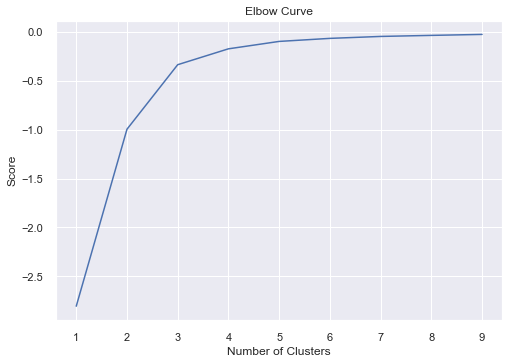

In [276]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_dam[['Latitude']]
X_axis = df_dam[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [277]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,name,Latitude,Longitude,cluster_label
0,담주 마을회관,35.321335,126.980544,0
1,천변 마을회관,35.317679,126.979993,0
2,금곡 마을회관,35.318051,126.984516,0
3,객사1리 마을회관,35.322660,126.988009,0
4,객사2리 마을회관,35.322303,126.984195,0
5,향백동 마을회관,35.320425,126.981864,0
6,내동 마을회관,35.320425,126.981864,0
7,신기 마을회관,35.320425,126.981864,0
8,미리산 마을회관,35.320425,126.981864,0
9,서당골 마을회관,35.320425,126.981864,0


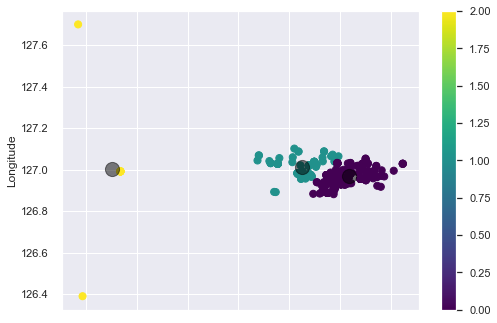

In [278]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [279]:
# df.head(5)

In [280]:
X.head(5)

,name,Latitude,Longitude,cluster_label
0,담주 마을회관,35.321335,126.980544,0
1,천변 마을회관,35.317679,126.979993,0
2,금곡 마을회관,35.318051,126.984516,0
3,객사1리 마을회관,35.322660,126.988009,0
4,객사2리 마을회관,35.322303,126.984195,0


In [281]:
X = X[['name','cluster_label']]
X.head(5)

,name,cluster_label
0,담주 마을회관,0
1,천변 마을회관,0
2,금곡 마을회관,0
3,객사1리 마을회관,0
4,객사2리 마을회관,0


In [282]:
clustered_data_dam = df_dam.merge(X, left_on='name', right_on='name')
clustered_data_dam.head(5)

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS,cluster_label
0,0,담주 마을회관,담양군,35.321335,126.980544,0,0
1,1,천변 마을회관,담양군,35.317679,126.979993,0,0
2,2,금곡 마을회관,담양군,35.318051,126.984516,0,0
3,3,객사1리 마을회관,담양군,35.322660,126.988009,0,0
4,4,객사2리 마을회관,담양군,35.322303,126.984195,0,0


In [283]:
clustered_data_dam.to_csv('clustered_data_dam.csv', index=None, header = True, encoding = 'cp949')

In [284]:
# Variable with the Longitude and Latitude
X = df_sin.loc[:,['name','Latitude','Longitude']]
X

,name,Latitude,Longitude
288,원심동,35.098625,126.191315
289,당촌,35.043330,126.152232
290,선도(진변),34.976943,126.269537
291,태천1,35.035199,126.242300
292,둔곡,35.085599,126.217201
...,...,...,...
800,자라도보건진료소,34.689918,126.169245
801,추포도보건진료소,34.812837,126.066108
808,구영약국,34.828926,126.114575
809,세명약국,34.721212,125.932763


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


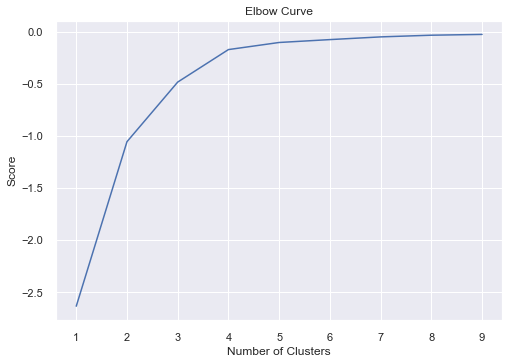

In [285]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_sin[['Latitude']]
X_axis = df_sin[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [286]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:4]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X

,name,Latitude,Longitude,cluster_label
288,원심동,35.098625,126.191315,2
289,당촌,35.043330,126.152232,2
290,선도(진변),34.976943,126.269537,0
291,태천1,35.035199,126.242300,2
292,둔곡,35.085599,126.217201,2
...,...,...,...,...
800,자라도보건진료소,34.689918,126.169245,3
801,추포도보건진료소,34.812837,126.066108,3
808,구영약국,34.828926,126.114575,3
809,세명약국,34.721212,125.932763,3


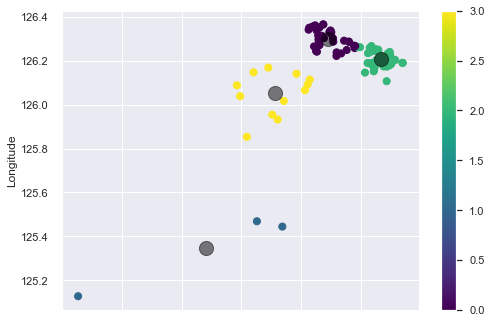

In [287]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [288]:
X.head(5)

,name,Latitude,Longitude,cluster_label
288,원심동,35.098625,126.191315,2
289,당촌,35.043330,126.152232,2
290,선도(진변),34.976943,126.269537,0
291,태천1,35.035199,126.242300,2
292,둔곡,35.085599,126.217201,2


In [289]:
X = X[['name','cluster_label']]
X.head(5)

,name,cluster_label
288,원심동,2
289,당촌,2
290,선도(진변),0
291,태천1,2
292,둔곡,2


In [290]:
clustered_data_sin = df_sin.merge(X, left_on='name', right_on='name')
clustered_data_sin.head(5)

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS,cluster_label
0,289,원심동,신안군,35.098625,126.191315,12,2
1,290,당촌,신안군,35.043330,126.152232,3,2
2,291,선도(진변),신안군,34.976943,126.269537,0,0
3,292,태천1,신안군,35.035199,126.242300,2,2
4,293,둔곡,신안군,35.085599,126.217201,0,2


In [291]:
clustered_data_sin.to_csv('clustered_data_sin.csv', index=None, header = True, encoding = 'cp949')

In [292]:
# Variable with the Longitude and Latitude
X = df_ham.loc[:,['name','Latitude','Longitude']]
X

,name,Latitude,Longitude
367,대성,35.066943,126.512093
368,함평리,35.065233,126.511625
369,누각옥천,35.064421,126.517251
370,기각2리,35.064490,126.522947
371,기산,35.068565,126.519606
...,...,...,...
791,양정보건진료소,35.163860,126.630430
792,정산보건진료소,35.200563,126.610793
811,미래약국,35.181045,126.604865
812,새태평양약국,35.112403,126.610922


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


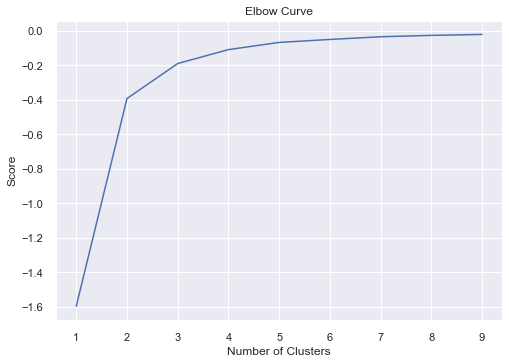

In [293]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_ham[['Latitude']]
X_axis = df_ham[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [294]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,name,Latitude,Longitude,cluster_label
367,대성,35.066943,126.512093,1
368,함평리,35.065233,126.511625,1
369,누각옥천,35.064421,126.517251,1
370,기각2리,35.064490,126.522947,1
371,기산,35.068565,126.519606,1
372,기각4리,35.066676,126.517523,1
373,기각5리,35.065802,126.520236,1
374,서부,35.062885,126.517946,1
375,내교2리,35.062476,126.514525,1
376,내교3리신기,35.062052,126.515319,1


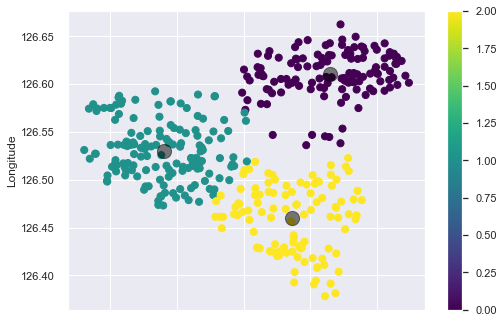

In [295]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [296]:
X.head(5)

,name,Latitude,Longitude,cluster_label
367,대성,35.066943,126.512093,1
368,함평리,35.065233,126.511625,1
369,누각옥천,35.064421,126.517251,1
370,기각2리,35.064490,126.522947,1
371,기산,35.068565,126.519606,1


In [297]:
X = X[['name','cluster_label']]
X.head(5)

,name,cluster_label
367,대성,1
368,함평리,1
369,누각옥천,1
370,기각2리,1
371,기산,1


In [298]:
clustered_data_ham = df_ham.merge(X, left_on='name', right_on='name')
clustered_data_ham

,Unnamed: 0,name,city,Latitude,Longitude,NUMPOINTS,cluster_label
0,368,대성,함평군,35.066943,126.512093,0,1
1,368,대성,함평군,35.066943,126.512093,0,2
2,368,대성,함평군,35.066943,126.512093,0,0
3,463,대성,함평군,35.123536,126.424024,20,1
4,463,대성,함평군,35.123536,126.424024,20,2
...,...,...,...,...,...,...,...
480,792,양정보건진료소,함평군,35.163860,126.630430,13,0
481,793,정산보건진료소,함평군,35.200563,126.610793,21,0
482,812,미래약국,함평군,35.181045,126.604865,15,0
483,813,새태평양약국,함평군,35.112403,126.610922,17,0


In [299]:
clustered_data_ham.to_csv('clustered_data_ham.csv', index=None, header = True, encoding = 'cp949')